/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)


[[0. 1. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 0. 0. 1.]
 [1. 1. 0. ... 1. 1. 1.]
 ...
 [1. 0. 1. ... 0. 0. 1.]
 [1. 0. 1. ... 0. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


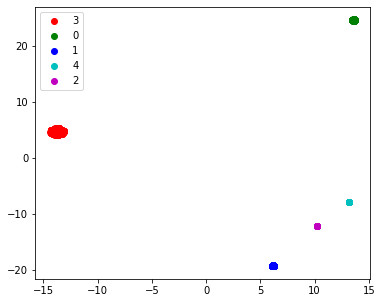

In [1]:
import pandas as pd
import numpy as np
countries_final = pd.DataFrame()

url = 'https://raw.githubusercontent.com/ISwifton/Clustering-of-sociological-data/main/data_countries_2.csv'
countries_rawdata=pd.read_csv(url)
countries=countries_rawdata.to_numpy()
# Compute pairwise distance matrix (by country)

for i in range(len(countries)):
  for j in range(len(countries)):
    if np.array_equal(countries[i], countries[j]):  # compare rows
      countries_final.loc[i, j] = int(0) # set 0 in the new data frame cell if two raws with persons' features are equal
    else:
         countries_final.loc[i, j] = int(1) # otherwise, we put 1

print(countries_final.to_numpy()) 

# make TSNE clustering
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
Coutries_tsne = TSNE(n_components=2, random_state=0)
Coutries_kmns = KMeans(n_clusters=5).fit(countries_final)

Coutries_2d = Coutries_tsne.fit_transform(countries_final)
Coutries_y=Coutries_kmns.labels_
Coutries_target_ids = range(len(Coutries_y))

# visualize clusters
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
Coutries_colors = 'r', 'g', 'b', 'c', 'm'
for Coutries_i, Coutries_c, Coutries_label in zip(Coutries_target_ids, Coutries_colors, Coutries_y):
    plt.scatter(Coutries_2d[Coutries_y == Coutries_i, 0], Coutries_2d[Coutries_y == Coutries_i, 1], c=Coutries_c, label=Coutries_label)
plt.legend()
plt.show()